In [1]:
import tushare as ts
import matplotlib.pyplot as plt

def rebalance(asset, price):
    money = asset * 0.5
    stock = money / price
    return money, stock

asset = 10000
hist_money = []
hist_stock = []
hist_allin_money = []
hist_allin_stock = []
allin_money = 10000
allin_stock = 0
days = 0
interval = 180
df=ts.get_k_data('399300',start='2012-01-01',end='2016-01-01')
# print(df)
for price in df.close:
    days -= 1
    if days < 0:
        money, stock = rebalance(asset, price)
        days = interval
    stock_p = stock * price
    money *= 1.0001
    asset = money + stock_p
    hist_money.append(money)
    hist_stock.append(stock_p)
    # 对比
    allin_money *= 1.0001
    hist_allin_money.append(allin_money)
    if allin_stock == 0:
        allin_stock = 10000 / price
    hist_allin_stock.append(allin_stock * price)

print(asset)
print(allin_money)
print(allin_stock * price)

13543.007749760664
11018.550299673843
16230.560087003807


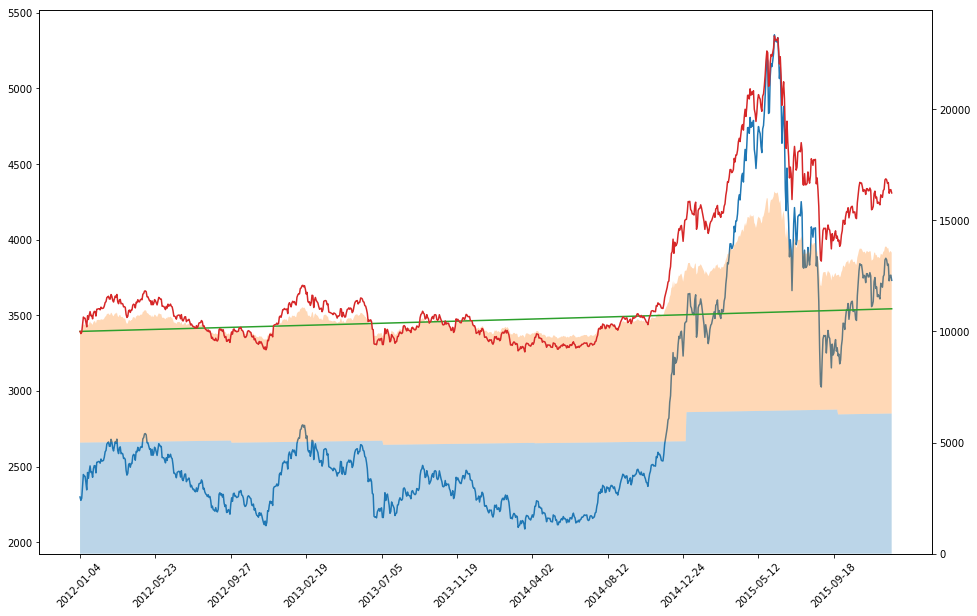

In [2]:
# draw
date = list(df.date)

fig, left_axis = plt.subplots()
fig.set_size_inches(16, 10)
right_axis = left_axis.twinx()

p1 = left_axis.plot(date, df.close)
p2 = right_axis.stackplot(date, hist_money, hist_stock, alpha=0.3)
p3 = right_axis.plot(date, hist_allin_money)
p4 = right_axis.plot(date, hist_allin_stock)

xticks = list(range(0, len(date), 90))
xlabels = [date[x] for x in xticks]
left_axis.set_xticks(xticks)
left_axis.set_xticklabels(xlabels, rotation=45)
plt.show()

13523.980170680894
10501.127665981778
16068.18318848569


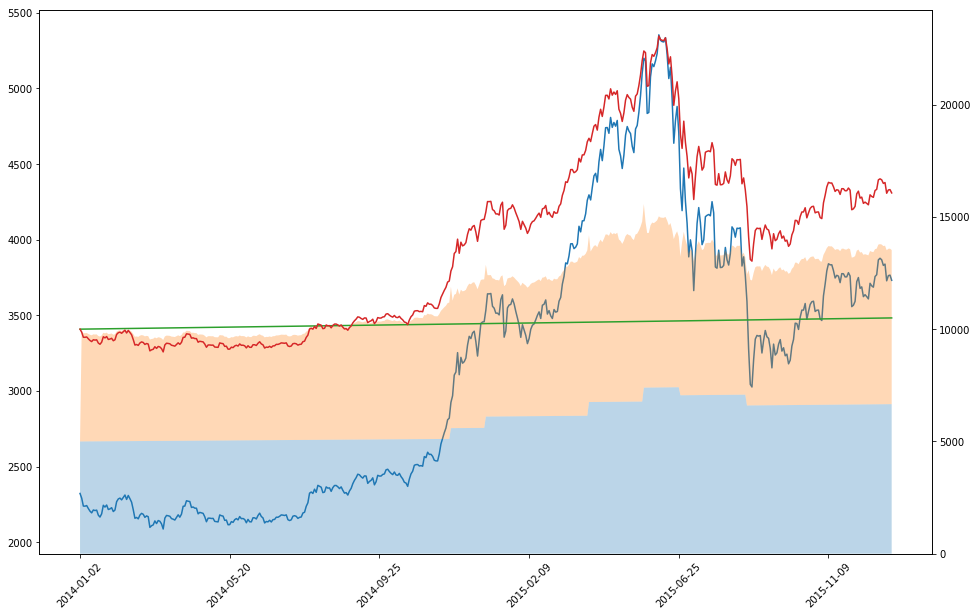

In [3]:
# 按比例触发再平衡
def rebalance(asset, price):
    money = asset * 0.5
    stock = money / price
    return money, stock

money = 10000
asset = money
stock = 0
hist_money = []
hist_stock = []
hist_allin_money = []
hist_allin_stock = []
allin_money = 10000
allin_stock = 0
days = 0
interval = 360
df=ts.get_k_data('399300',start='2014-01-01',end='2016-01-01')
# df=ts.get_k_data('601005',start='2007-10-01')
# print(df)
for price in df.close:
    days -= 1
    stock_p = stock * price
    if (money == 0 or stock == 0) or (money / stock_p > 1.2 or stock_p / money > 1.2):
#     if days < 0:
        money, stock = rebalance(asset, price)
        days = interval
    money *= 1.0001
    asset = money + stock_p
    hist_money.append(money)
    hist_stock.append(stock_p)
    # 对比
    allin_money *= 1.0001
    hist_allin_money.append(allin_money)
    if allin_stock == 0:
        allin_stock = 10000 / price
    hist_allin_stock.append(allin_stock * price)

print(asset)
print(allin_money)
print(allin_stock * price)

# draw
date = list(df.date)

fig, left_axis = plt.subplots()
fig.set_size_inches(16, 10)
right_axis = left_axis.twinx()

p1 = left_axis.plot(date, df.close)
p2 = right_axis.stackplot(date, hist_money, hist_stock, alpha=0.3)
p3 = right_axis.plot(date, hist_allin_money)
p4 = right_axis.plot(date, hist_allin_stock)

xticks = list(range(0, len(date), 90))
xlabels = [date[x] for x in xticks]
left_axis.set_xticks(xticks)
left_axis.set_xticklabels(xlabels, rotation=45)
plt.show()

timed out
131010.40112627439
118317.0002478366
108857.73772375828
101000


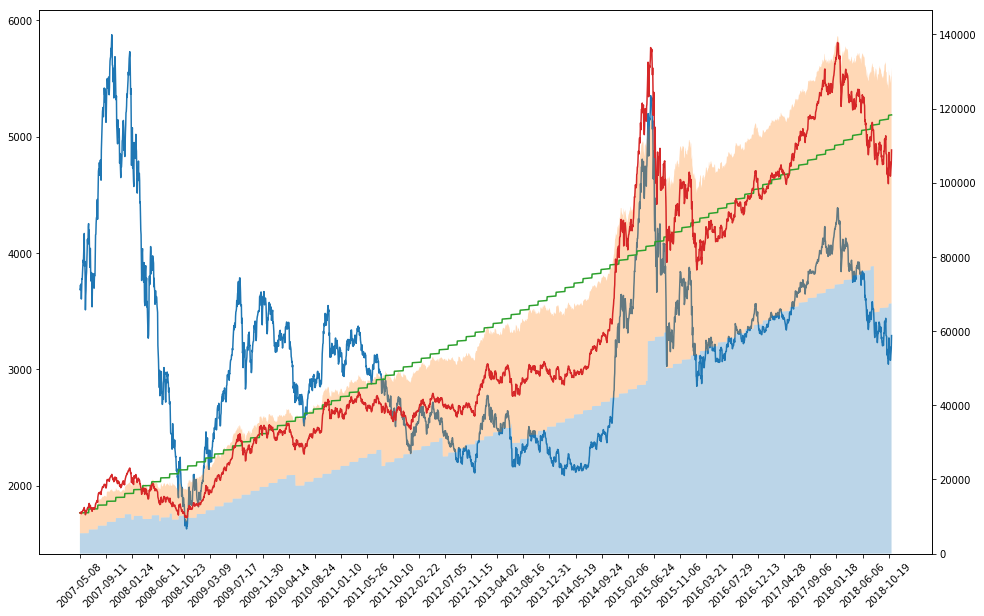

In [4]:
# 与定投结合
def rebalance(asset, price):
    money = asset * 0.5
    stock = money / price
    return money, stock

money = 10000
cost = money
asset = money
stock = 0
hist_money = []
hist_stock = []
hist_allin_money = []
hist_allin_stock = []
allin_money = 10000
allin_stock = 0
days = 0
interval = 30
df=ts.get_k_data('399300',start='2007-05-01')
# print(df)

for price in df.close:
    days -= 1
    stock_p = stock * price
    if allin_stock == 0:
        allin_stock = 10000 / price
    if days < 0:
        days = interval
        cost += 1000
        money += 1000
        allin_money += 1000
        allin_stock += (1000/price)
        asset = money + stock_p
    if (money == 0 or stock == 0) or (money / stock_p > 1.5 or stock_p / money > 1.5):
#     if days < 0:
        money, stock = rebalance(asset, price)
        stock_p = stock * price
    money *= 1.0001
    asset = money + stock_p
    hist_money.append(money)
    hist_stock.append(stock_p)
    # 对比
    allin_money *= 1.0001
    hist_allin_money.append(allin_money)
    hist_allin_stock.append(allin_stock * price)

print(asset)
print(allin_money)
print(allin_stock * price)
print(cost)

# draw
date = list(df.date)

fig, left_axis = plt.subplots()
fig.set_size_inches(16, 10)
right_axis = left_axis.twinx()

p1 = left_axis.plot(date, df.close)
p2 = right_axis.stackplot(date, hist_money, hist_stock, alpha=0.3)
p3 = right_axis.plot(date, hist_allin_money)
p4 = right_axis.plot(date, hist_allin_stock)

xticks = list(range(0, len(date), 90))
xlabels = [date[x] for x in xticks]
left_axis.set_xticks(xticks)
left_axis.set_xticklabels(xlabels, rotation=45)
plt.show()

In [79]:
import random
import datetime

def calc_rate(asset, days):
    r = asset / 10000 - 1
    return (r / (days / 240) * 100)

rate1 = []
rate2 = []
rate3 = []
for i in range(1000):
    print(i)
    money = 10000
    asset = money
    stock = 0
    hist_money = []
    hist_stock = []
    hist_allin_money = []
    hist_allin_stock = []
    allin_money = 10000
    allin_stock = 0
    days = 0
    interval = 180
    date_s = datetime.date.today() - datetime.timedelta(days=random.randint(2000,5000))
    date_e = date_s + datetime.timedelta(days=random.randint(1000, 5000))
    date_s = date_s.strftime('%Y-%m-%d')
    date_e = date_e.strftime('%Y-%m-%d')
#     print(date_s,date_e)
    df = ts.get_k_data('399300',start=date_s, end=date_e)
    # print(df)
    for price in df.close:
        days -= 1
        stock_p = stock * price
        if (money == 0 or stock == 0) or (money / stock_p > 1.2 or stock_p / money > 1.2):
    #     if days < 0:
            money, stock = rebalance(asset, price)
            days = interval
        money *= 1.0001
        asset = money + stock_p
        hist_money.append(money)
        hist_stock.append(stock_p)
        # 对比
        allin_money *= 1.0001
        hist_allin_money.append(allin_money)
        if allin_stock == 0:
            allin_stock = 10000 / price
        hist_allin_stock.append(allin_stock * price)

    days = len(df['date'])
    print(df['date'].iloc[0], df['date'].iloc[-1], days)
    print(int(asset), int(allin_money), int(allin_stock * price))
    r1 = calc_rate(asset, days)
    r2 = calc_rate(allin_money, days)
    r3 = calc_rate(allin_stock * price, days)
    rate1.append(r1)
    rate2.append(r2)
    rate3.append(r3)
    print(r1, r2, r3)
    print('=====================')

print(sum(rate1)/len(rate1), sum(rate2)/len(rate2), sum(rate3)/len(rate3))

0
2009-09-21 2015-08-05 1425
12533 11531 12051
4.267737087608675 2.579281942208345 3.4554503193719532
1
2010-04-12 2016-12-23 1631
12055 11771 9869
3.025367658904451 2.6066678145098883 -0.19264943141062707
2
2011-08-01 2018-11-02 1765
12121 11930 11049
2.8850169590534986 2.6246875781854553 1.427165655842014
3
2007-11-28 2012-05-04 1077
9642 11137 5842
-0.7974231255390308 2.5338737439170136 -9.265353477325275
4
2013-04-08 2018-11-02 1359
13410 11455 13308
6.023618983340829 2.5705880361860096 5.842750925285271
5
2009-06-19 2018-11-02 2281
13205 12561 10682
3.3723164628081013 2.6956241739216646 0.7182427392861406
6
2009-12-10 2018-11-02 2163
11754 12414 9197
1.946599270593558 2.6791826905694514 -0.8901709313362569
7
2013-01-23 2018-11-02 1405
13035 11508 12618
5.1846507458653806 2.5766433380904528 4.473056816203756
8
2009-03-26 2013-06-07 1021
11081 11074 10017
2.5421295950360707 2.526665518014677 0.04142399992094527
9
2007-04-09 2013-05-06 1476
11582 11590 8314
2.57236426896583 2.5860265

2011-11-16 2018-11-02 1694
13199 11845 12322
4.532725064805152 2.6151194652597263 3.290408342683828
67
2010-05-20 2018-11-02 2056
13371 12282 12068
3.9351467793055366 2.6643872611998027 2.414024610074108
68
2006-08-07 2012-02-20 1347
18053 11441 20755
14.34911590861779 2.569011478157573 19.16390006275235
69
2006-06-22 2016-06-17 2431
21828 12751 23358
11.677194087956302 2.7167154765096013 13.188589965322967
70
2009-07-03 2016-05-06 1663
11692 11809 9408
2.443035968384013 2.61095621988521 -0.8535931920257103
71
2010-03-01 2018-11-02 2112
12519 12351 9896
2.862898112216468 2.672117271451691 -0.11817094953049413
72
2005-05-16 2018-08-10 3226
28067 13806 38902
13.441680925473474 2.832168773832253 21.502177370814444
73
2006-06-30 2017-12-01 2782
23809 13207 28681
11.913512328346187 2.766918337099568 16.116651073392347
74
2006-01-16 2016-06-08 2527
25000 12874 32908
14.246177667069887 2.730327219280955 21.75752991012096
75
2008-07-07 2013-04-10 1157
10695 11226 8621
1.4419616417698535 2.5442

2009-11-02 2018-11-02 2191
12249 12449 9697
2.4642396271904334 2.6830721518901575 -0.33109015671600867
133
2006-09-05 2018-07-20 2889
23690 13349 26053
11.373053389449959 2.7824626706874116 13.335927141140786
134
2012-08-20 2018-11-02 1509
14221 11628 14294
6.713488956983409 2.590403036443925 6.829916628891734
135
2013-03-04 2018-11-02 1382
13046 11481 12924
5.290477019882488 2.573613339574847 5.078959689965598
136
2012-01-31 2016-01-08 961
12782 11008 13641
6.9478658637073005 2.518972472676603 9.093665898887156
137
2010-11-02 2017-09-22 1681
12599 11830 11081
3.711607172832417 2.6133725261417973 1.544338529655837
138
2011-11-11 2018-11-02 1697
13663 11849 12208
5.1811680620043115 2.615522823094295 3.1237051524954547
139
2011-04-25 2018-11-02 1833
12390 12011 10125
3.129501007696593 2.6338945788988455 0.16390938633416532
140
2008-11-07 2018-06-15 2337
18612 12632 22370
8.844517584669907 2.703473124845044 12.704226729927766
141
2012-02-24 2018-11-02 1629
13202 11769 12425
4.718889542112

2010-12-22 2018-11-02 1913
12504 12108 10232
3.141739078953782 2.6447807260033303 0.2918475882870068
198
2006-02-06 2018-11-02 3104
24400 13639 31844
11.134418582479828 2.814041953748402 16.88993309041579
199
2008-09-01 2013-09-12 1222
11355 11299 10858
2.6621681427671318 2.5526645793843503 1.6864945494086354
200
2007-11-26 2018-11-02 2662
12505 13049 6854
2.258454769444644 2.7496198068039797 -2.835846800499731
201
2010-09-02 2017-06-29 1655
12953 11799 12558
4.283173162626546 2.609883249088418 3.710223237378135
202
2008-11-11 2018-11-02 2428
16933 12747 18470
6.8538500636889825 2.716291539848412 8.372756161573308
203
2006-04-10 2009-05-21 760
17297 10789 24599
23.04490127518222 2.4934255067557123 46.10389029528317
204
2008-12-15 2012-04-20 813
12385 10846 13300
7.042990049378416 2.5001283439084183 9.74244624954364
205
2011-09-01 2018-11-02 1742
12822 11902 11607
3.8883170702046095 2.621583017430896 2.215032597652561
206
2005-10-10 2010-01-08 1038
22546 11093 38359
29.00907011055623 2.

2007-08-13 2018-11-02 2732
12948 13141 6969
2.590584585319585 2.7596934202524896 -2.6625666754606994
263
2009-08-17 2018-11-02 2240
12796 12510 10477
2.9959918684976263 2.6898965190581716 0.5117166904210696
264
2009-06-02 2018-03-01 2129
14922 12372 14132
5.5491712121006325 2.6744696958656204 4.658475652119559
265
2009-04-29 2015-09-18 1555
13068 11682 12479
4.7352681479886805 2.5965199273616757 3.8262797982899706
266
2010-03-11 2014-05-30 1023
9000 11077 6579
-2.344873915391458 2.526922487574798 -8.023649606550583
267
2006-08-14 2016-01-22 2298
20772 12583 24993
11.250137761641417 2.698003736005362 15.658753954742084
268
2010-04-12 2018-11-02 2083
12453 12315 9817
2.827300119449849 2.6681105662873454 -0.21049203769482042
269
2009-11-03 2018-11-02 2190
11993 12448 9577
2.184371128570067 2.682933115268991 -0.46311923067276445
270
2007-06-04 2015-02-26 1881
13194 12069 10156
4.075302530703846 2.6404191915950452 0.1993398991503103
271
2011-01-05 2018-11-02 1904
12890 12097 10360
3.6437359

2009-02-26 2018-11-02 2358
15367 12659 15022
5.4626417898691955 2.7064241882925546 5.112131568587
328
2011-12-26 2018-11-02 1666
13883 11812 14086
5.593945482966532 2.6113587335030926 5.887323032993649
329
2012-06-11 2018-11-02 1558
13392 11685 12861
5.225670363554648 2.5969195152433953 4.407621125908278
330
2009-06-01 2014-04-11 1181
10125 11253 7944
0.2558762606167107 2.5473327004877704 -4.178120662954499
331
2007-12-21 2015-09-17 1882
10669 12070 6344
0.8532663075785797 2.6405553465675986 -4.661308445581986
332
2013-03-11 2018-11-02 1377
13051 11476 12692
5.3182099517796715 2.5729552658101267 4.692033096656712
333
2012-12-24 2018-11-02 1424
13587 11530 13817
6.045953153378192 2.579149927455915 6.4339835618206855
334
2012-04-24 2018-11-02 1590
13133 11723 12631
4.730146556529431 2.601186826450621 3.971545025496872
335
2006-10-16 2016-08-19 2399
21189 12711 23722
11.194272438712284 2.7121979400893172 13.727768235495862
336
2012-07-23 2015-09-18 769
12808 10799 13744
8.765686378675264 

2009-04-27 2015-09-25 1562
13837 11690 12859
5.895789896395072 2.5974524250085373 4.393504565071387
393
2006-03-06 2018-11-02 3084
24257 13612 31671
11.095494339549429 2.8110847421059173 16.864927205588806
394
2010-05-17 2018-11-02 2059
13404 12286 12120
3.967871448809887 2.6648006252833323 2.4712467457006912
395
2009-06-16 2018-11-02 2284
13545 12565 11111
3.7253247249449095 2.6960438970355693 1.1675620372826183
396
2007-09-04 2016-03-25 2080
10919 12312 5965
1.061058486745539 2.667696529061824 -4.654944464527083
397
2012-03-12 2016-12-09 1156
13186 11225 13161
6.615954439823836 2.5440887697519963 6.564539441986771
398
2009-11-30 2014-07-08 1116
8764 11180 6209
-2.657389740576717 2.5389098192994077 -8.152234403929558
399
2006-12-18 2016-07-12 2326
17209 12618 17082
7.438796466517605 2.701929009296617 7.307744315538837
400
2008-12-29 2018-11-02 2394
16543 12704 17739
6.560301399640927 2.7114929623066217 7.758889124729053
401
2012-03-22 2018-11-02 1610
13180 11746 12734
4.74076704218943

2006-08-16 2018-11-02 2972
21728 13460 25633
9.471280704270015 2.7945988271269333 12.624698080097119
459
2007-04-30 2010-11-29 873
11749 10912 8964
4.809768219506562 2.507745290793328 -2.847937263185091
460
2011-07-29 2018-11-02 1766
12132 11931 11070
2.8984909351763597 2.624822668660748 1.4548535402320173
461
2008-01-11 2018-11-02 2630
11571 13008 5773
1.4339522826715505 2.7450307011384885 -3.857129118280562
462
2013-05-08 2018-11-02 1340
13068 11433 12939
5.495148308339566 2.568092408043113 5.264733435230644
463
2006-07-17 2011-08-03 1232
17522 11311 21533
14.654452332421238 2.5539672719876925 22.466940965756777
464
2013-01-04 2018-11-02 1418
13167 11523 13033
5.360507825852931 2.57835802589484 5.13467742150411
465
2007-02-12 2013-09-13 1602
12700 11737 10014
4.0462254568578455 2.602789447189818 0.021157351426907455
466
2010-03-02 2013-10-16 877
9399 10916 7311
-1.642775034553629 2.508254178994956 -7.356157676392071
467
2007-10-08 2017-01-13 2259
11442 12534 5872
1.5320324846465305 2

2005-10-10 2009-10-22 983
22265 11032 36892
29.947490068220752 2.521789654571095 65.65791178509734
524
2013-04-09 2018-11-02 1358
13367 11454 13216
5.951471563363252 2.570456607635841 5.685209377471812
525
2012-12-10 2018-11-02 1434
13916 11541 14487
6.5544800918144475 2.58047047575627 7.510948938056872
526
2009-07-20 2018-03-22 2110
13429 12348 11195
3.9011111816176633 2.6718406939134116 1.3595304436567546
527
2007-07-03 2018-11-02 2761
14290 13179 8585
3.7299395349986275 2.763880872429779 -1.2293527847332553
528
2013-04-08 2016-06-14 776
12434 10806 12441
7.529277508538692 2.495446493634691 7.551881027350042
529
2012-05-07 2018-11-02 1583
13527 11715 12106
5.3473772467620435 2.6002525639950695 3.19351353463133
530
2010-04-12 2015-09-15 1320
11457 11411 9405
2.6493553293381935 2.5654688814401725 -1.0809233744308948
531
2012-05-18 2018-11-02 1574
13329 11704 12782
5.076887933347353 2.599052018188309 4.2430495876566985
532
2010-08-10 2014-01-24 838
9412 10874 7927
-1.6820540387069995 2.

2010-10-08 2014-12-19 1023
11500 11077 11113
3.5195401325798743 2.526922487574798 2.6120469065255207
589
2008-01-21 2012-11-23 1180
7970 11252 4261
-4.127549644007256 2.547202838424679 -11.672208588150774
590
2013-03-25 2018-11-02 1367
12995 11464 12591
5.259489054776199 2.5716397836062246 4.549582869519863
591
2005-04-08 2012-11-20 1854
17510 12036 21574
9.722498024584429 2.636746488960592 14.98300120248573
592
2007-02-16 2011-08-26 1103
13223 11166 10838
7.014991291926329 2.5372296592776347 1.8247660577309717
593
2007-07-05 2010-12-10 839
11629 10875 8938
4.661650942574061 2.503425254563416 -3.0361545471076217
594
2009-03-31 2014-11-05 1360
11643 11456 9982
2.9005996265378675 2.570719473596256 -0.030540131069234366
595
2007-01-22 2018-06-22 2778
17444 13202 14485
6.431427093922813 2.766339437080027 3.8755534973910573
596
2009-08-21 2018-11-02 2236
12822 12505 10270
3.029147989727188 2.689338576630433 0.2902463457623226
597
2009-04-03 2018-11-02 2332
14594 12626 12800
4.72831668381718

2013-03-06 2017-11-14 1144
14209 11211 15468
8.83120153971229 2.542533620666992 11.471492057862903
654
2009-10-09 2018-11-02 2207
12729 12469 10399
2.968682136903623 2.685298021566723 0.43495073735626166
655
2007-08-08 2018-11-02 2735
12964 13145 7048
2.6010141714172526 2.760126221233292 -2.5900817931387543
656
2011-03-07 2014-02-17 714
8920 10740 6932
-3.629129499665329 2.487627236999243 -10.310914868900017
657
2005-05-30 2013-11-01 2048
19883 12272 27874
11.582607267858426 2.6632853678691766 20.946541429506432
658
2009-01-19 2016-11-11 1899
16076 12091 16980
7.679662381506852 2.642871391930708 8.82188012913357
659
2010-07-15 2018-11-02 2019
14273 12237 12611
5.079803310266094 2.659296009571175 3.1048857675522035
660
2009-03-23 2018-11-02 2341
14992 12637 13487
5.118525438925524 2.704034907578919 3.57585427358924
661
2009-02-27 2018-11-02 2357
15982 12657 15371
6.091816852064894 2.706283565955599 5.469475124622683
662
2010-12-27 2017-10-27 1662
13697 11807 12975
5.339719996679531 2.61

2005-08-29 2017-08-30 2920
28407 13390 41796
15.129427118917288 2.7869874097084097 26.134239318146086
719
2013-03-18 2018-11-02 1372
13345 11470 13147
5.852286144795399 2.5722974138484904 5.506538810959447
720
2012-04-16 2015-06-24 776
14266 10806 18959
13.194277765909415 2.495446493634691 27.708338306328038
721
2009-10-28 2018-11-02 2194
12460 12453 9882
2.6918591896620807 2.683489318370549 -0.12840215994578127
722
2006-05-29 2018-11-02 3029
22280 13537 24081
9.730420731240793 2.8029732186436394 11.157454315592187
723
2005-09-08 2016-05-05 2588
25355 12953 33643
14.240065470480815 2.7390226558437636 21.92619638001213
724
2010-05-04 2016-03-18 1427
11910 11533 10505
3.2132798155586264 2.5795459984269 0.8494948273468541
725
2005-04-18 2009-05-18 993
19948 11043 29162
24.04392479737778 2.5230715693509684 46.3135909468315
726
2009-12-04 2018-11-02 2167
11776 12419 9030
1.9677727046392608 2.6797378755833474 -1.0737535794429909
727
2009-12-24 2014-02-24 1006
8683 11058 6439
-3.1414569598223

2012-01-12 2018-11-02 1655
13722 11799 13511
5.397477453029401 2.609883249088418 5.091624816691194
784
2011-07-26 2016-02-19 1108
11191 11171 10247
2.5798671993039246 2.5378757007804653 0.5369026362603174
785
2008-03-17 2017-08-24 2300
13880 12585 9418
4.04932350555845 2.6982838651554406 -0.6069114698188981
786
2013-02-20 2018-11-02 1390
12809 11491 12174
4.851562943040834 2.5746667191578867 3.754027237316798
787
2013-01-22 2017-02-03 978
12843 11027 12955
6.976872996028565 2.5211490201835107 7.253480849157808
788
2008-05-05 2018-11-02 2557
13198 12913 8112
3.0019135915402644 2.7345991522466275 -1.7716108815635963
789
2012-10-22 2018-08-09 1414
13912 11518 14509
6.641007474550492 2.5778302695224466 7.654031041287709
790
2007-02-05 2015-03-02 1958
15301 12162 15852
6.497864733955941 2.6509301456690717 7.173047951878973
791
2009-12-25 2013-11-21 944
9025 10989 7036
-2.4774525070859132 2.5167984100058343 -7.533272044943668
792
2011-05-30 2015-07-13 1002
12546 11053 14255
6.098264184755926

2006-09-21 2017-09-05 2665
24408 13053 27801
12.975421551406127 2.7500505484825015 16.03106643353878
849
2007-01-04 2018-11-02 2879
18239 13336 15917
6.868752134367664 2.781005118134141 4.932799474352537
850
2011-04-26 2015-06-25 1013
12895 11066 14566
6.860214509388266 2.525637985202729 10.819995712263712
851
2011-06-29 2016-06-03 1200
11430 11274 10630
2.8603272023146564 2.549801741390123 1.2609285473823162
852
2006-06-07 2009-05-05 711
16630 10736 20655
22.38206598644202 2.487249709951512 35.96816064302311
853
2012-03-05 2018-11-02 1623
13165 11762 12356
4.680585350691221 2.6055971610863153 3.4851286760405475
854
2009-03-13 2015-06-24 1527
16179 11649 22127
9.712842792405347 2.59279434063425 19.061522996595333
855
2007-04-06 2010-12-31 913
12416 10955 10525
6.353401689706247 2.512840329297061 1.382006939642816
856
2008-04-28 2018-08-16 2510
13347 12852 8786
3.200755732275038 2.72791032541291 -1.1600306468907364
857
2005-05-09 2015-09-18 2525
25387 12872 35760
14.626171126000628 2.73

2008-05-05 2016-10-14 2055
12742 12281 8150
3.2024308949632587 2.6642494918521744 -2.159462931752479
914
2006-12-25 2015-04-24 2023
18483 12242 24251
10.064937785833028 2.659845799825077 16.90755884452208
915
2008-11-17 2018-11-02 2424
16268 12742 16557
6.205986405376927 2.7157264254588407 6.492128263963158
916
2005-05-30 2018-08-30 3230
27165 13812 39166
12.754288371304806 2.832765660463076 21.671399649220987
917
2005-09-14 2014-11-28 2235
22521 12504 28951
13.446028817626729 2.6891991146950835 20.350320918942675
918
2009-09-21 2017-12-01 1992
13812 12204 12460
4.593562525195738 2.6555888207938727 2.964698036677032
919
2012-04-05 2018-11-02 1603
12919 11738 13093
4.37105222780005 2.6029230575592837 4.632018872161171
920
2010-11-22 2015-04-17 1069
12962 11128 14489
6.651415146002833 2.5328423347126297 10.080441515127928
921
2011-07-05 2014-05-16 693
9122 10717 6872
-3.0402623685724155 2.484986141788176 -10.831037124071553
922
2007-12-05 2015-05-08 1803
11975 11975 9179
2.63005021160420

2011-03-08 2018-11-02 1865
12120 12050 9858
2.728182913033105 2.638241965029743 -0.18203308807717478
979
2011-08-12 2016-07-22 1201
12209 11276 11216
4.415457380685858 2.5499317784155777 2.4310607556229806
980
2005-10-11 2012-06-21 1630
19982 11770 27314
14.697960677533434 2.6065339511850234 25.49407541745834
981
2008-07-02 2015-11-12 1790
14438 11960 14058
5.951486045086227 2.628067582708353 5.441998028261585
982
2007-02-26 2010-06-01 800
12256 10832 10136
6.768390007447611 2.4984820447259066 0.41019987590852564
983
2012-06-11 2018-08-31 1519
13451 11640 13034
5.452894078390922 2.591731180078145 4.794074799245722
984
2008-06-02 2018-11-02 2537
13671 12887 9074
3.4732997894850266 2.731750228027706 -0.8755468829242419
985
2008-04-30 2018-11-02 2558
13347 12914 8310
3.141036969918017 2.7347417002728145 -1.585089370994709
986
2006-03-09 2018-11-02 3081
26819 13608 32760
13.102180041648378 2.8106415088892343 17.729558099542242
987
2011-03-17 2018-11-02 1858
12819 12041 10291
3.641376251755

5.87756427909
0.082035289517
14.1339300724


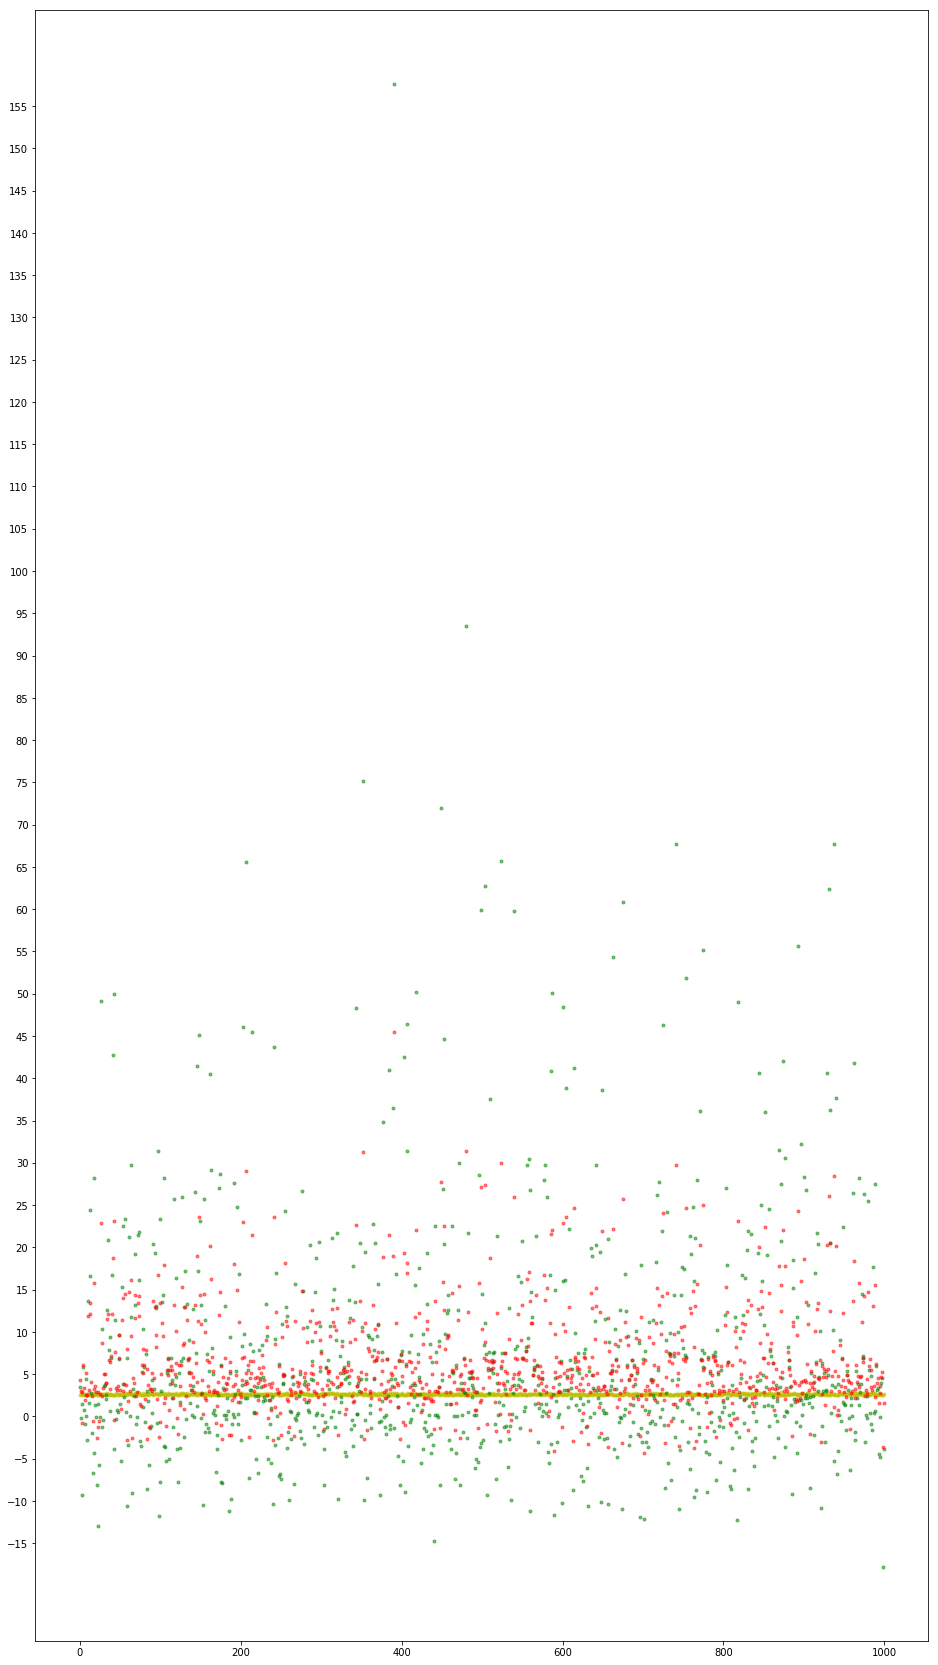

In [92]:
import numpy as np
print(np.std(rate1))
print(np.std(rate2))
print(np.std(rate3))

n = range(1000)
plt.scatter(n, rate2, marker='.', c='y' ,alpha=0.5)
plt.scatter(n, rate3, marker='.', c='g' ,alpha=0.5)
plt.scatter(n, rate1, marker='.', c='r' ,alpha=0.5)

fig = plt.gcf()
fig.set_size_inches(16, 30)
plt.yticks(np.arange(-15, 160, 5))
plt.show()